## Initialiezierung

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 20, 10

RANDOM_SEED = 42
LABELS = ["1", "2", "3", "4", "5"]

Using TensorFlow backend.


## Data Preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\srfzx\Downloads\ECG5000\ECG5000_TEST.csv")

In [3]:
df.head()

,class,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0.0,301.273,301.157,301.157,301.042,301.042,300.810,300.810,300.694,300.579,...,278.704000,279.514000,280.093000,279.977000,301.736000,297.519992,282.151866,288.134717,292.681649,309.375
1,0.0,308.333,307.986,307.986,307.870,307.755,307.407,307.407,307.292,307.060,...,340.584434,318.053974,312.014476,279.415664,289.181032,292.582603,282.977514,288.058017,292.706388,309.375
2,1.0,311.574,311.574,311.343,310.880,310.880,310.764,310.417,310.417,310.301,...,332.081664,316.799047,309.235254,280.545057,284.134451,293.492928,281.863389,288.067694,292.725693,309.375
3,1.0,310.648,310.301,310.301,310.185,309.838,309.838,309.491,309.259,309.259,...,328.758612,313.371526,306.393869,280.528349,281.696095,291.113504,282.283027,288.066856,292.717524,309.375
4,0.0,309.259,308.912,308.796,308.449,308.449,308.333,308.333,307.986,307.986,...,346.098240,324.122158,307.943794,270.351631,264.498992,269.254348,282.931963,288.053972,292.701375,309.375


# Exploration

In [4]:
df.shape

(1214, 260)

In [5]:
df.isnull().values.any()

False

In [6]:
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0,color='brown')
plt.title("ECG Classes Distribution")
plt.xticks(range(5), LABELS)
plt.xlabel("Target")
plt.ylabel("Data Points");
plt.savefig('ecgclass1.png')

KeyError: 'target'

We have a highly imbalanced dataset on our hands. Normal transactions overwhelm the fraudulent ones by a large margin. Let's look at the two types of transactions: 

In [7]:
df = df[df.target != 3]
df = df[df.target != 4]
df = df[df.target != 5]

In [8]:
df

,id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,1,3.690844,0.711414,-2.114092,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,1
1,2,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,1
2,3,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,1
3,4,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,1
4,5,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,...,1.280823,1.494316,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,1
5,6,1.649272,1.121169,-0.628753,-1.939899,-3.439175,-4.010776,-3.238067,-2.127737,-1.798465,...,0.636727,1.166689,1.062871,1.628234,2.175072,2.500749,2.092176,1.455313,2.124303,1
6,7,-0.323103,-1.510804,-2.768216,-3.788649,-4.100396,-3.516576,-2.940032,-1.828790,-1.089045,...,1.052238,0.213416,-1.003917,-1.676931,-2.055868,-1.968963,-1.548612,-1.411230,-2.620855,1
7,8,-1.309274,-4.045362,-4.757328,-4.657040,-3.634479,-2.469447,-1.640088,-1.408992,-0.706937,...,1.371353,1.257078,1.246964,1.156629,0.311326,-0.325923,-0.385273,0.385835,-0.393619,1
8,9,-1.736906,-3.647089,-4.005470,-4.413745,-4.082557,-3.234594,-1.935797,-1.367653,-1.055027,...,1.130086,1.317606,1.181094,0.976701,0.541003,0.288060,0.479704,0.658353,-0.326727,1
9,10,-1.101873,-1.965967,-2.399643,-2.905194,-3.107600,-3.041231,-2.105358,-1.621213,-1.589307,...,1.436628,0.931638,0.332091,0.409455,0.489593,0.890026,1.026954,0.937848,0.321598,1


In [9]:
#df.replace({'target': 1}, 2)
df=df.replace({'target': 1}, 0)


In [10]:
df=df.replace({'target': 2}, 1)

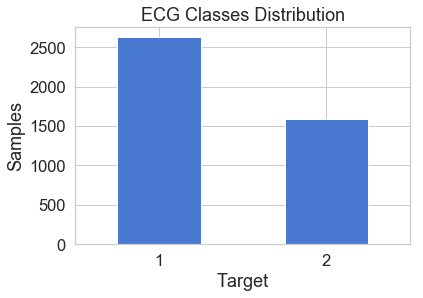

In [12]:
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("ECG Classes Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Target")
plt.ylabel("Samples");

## DROP ID weil rekonstruktion error = 18000 

In [13]:

df =df.drop(['id'], axis=1)

#data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [15]:
df.shape

(4217, 141)

## TRAINING

In [15]:
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.target == 0]
X_train = X_train.drop(['target'], axis=1)

y_test = X_test['target']
X_test = X_test.drop(['target'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [16]:
X_train.shape

(2073, 140)

## Modellierung

In [17]:
input_dim = X_train.shape[1]
encoding_dim = 70

In [18]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

## Training Zeit!

In [46]:
nb_epoch = 400
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 2073 samples, validate on 844 samples
Epoch 1/400
2073/2073 [==============================] - 0s 195us/step - loss: 0.6763 - accuracy: 0.4496 - val_loss: 0.7378 - val_accuracy: 0.3341
Epoch 2/400
2073/2073 [==============================] - 0s 68us/step - loss: 0.6671 - accuracy: 0.5104 - val_loss: 0.7365 - val_accuracy: 0.3282
Epoch 3/400
2073/2073 [==============================] - 0s 80us/step - loss: 0.6671 - accuracy: 0.5041 - val_loss: 0.7369 - val_accuracy: 0.3341
Epoch 4/400
2073/2073 [==============================] - 0s 69us/step - loss: 0.6675 - accuracy: 0.5002 - val_loss: 0.7362 - val_accuracy: 0.3175
Epoch 5/400
2073/2073 [==============================] - 0s 54us/step - loss: 0.6669 - accuracy: 0.5109 - val_loss: 0.7378 - val_accuracy: 0.3199
Epoch 6/400
2073/2073 [==============================] - 0s 59us/step - loss: 0.6675 - accuracy: 0.4858 - val_loss: 0.7359 - val_accuracy: 0.3211
Epoch 7/400
2073/2073 [==============================] - 0s 56us/step - loss

Epoch 112/400
2073/2073 [==============================] - 0s 51us/step - loss: 0.6547 - accuracy: 0.6131 - val_loss: 0.7183 - val_accuracy: 0.3578
Epoch 113/400
2073/2073 [==============================] - 0s 56us/step - loss: 0.6552 - accuracy: 0.6011 - val_loss: 0.7146 - val_accuracy: 0.4159
Epoch 114/400
2073/2073 [==============================] - 0s 44us/step - loss: 0.6542 - accuracy: 0.6068 - val_loss: 0.7152 - val_accuracy: 0.4348
Epoch 115/400
2073/2073 [==============================] - 0s 45us/step - loss: 0.6543 - accuracy: 0.6271 - val_loss: 0.7138 - val_accuracy: 0.4052
Epoch 116/400
2073/2073 [==============================] - 0s 66us/step - loss: 0.6540 - accuracy: 0.6305 - val_loss: 0.7163 - val_accuracy: 0.3839
Epoch 117/400
2073/2073 [==============================] - 0s 74us/step - loss: 0.6548 - accuracy: 0.6073 - val_loss: 0.7152 - val_accuracy: 0.4348
Epoch 118/400
2073/2073 [==============================] - 0s 62us/step - loss: 0.6550 - accuracy: 0.5991 - val_

2073/2073 [==============================] - 0s 47us/step - loss: 0.6529 - accuracy: 0.6141 - val_loss: 0.7128 - val_accuracy: 0.4017
Epoch 223/400
2073/2073 [==============================] - 0s 51us/step - loss: 0.6515 - accuracy: 0.6387 - val_loss: 0.7097 - val_accuracy: 0.4384
Epoch 224/400
2073/2073 [==============================] - 0s 51us/step - loss: 0.6513 - accuracy: 0.6421 - val_loss: 0.7099 - val_accuracy: 0.4372
Epoch 225/400
2073/2073 [==============================] - 0s 47us/step - loss: 0.6513 - accuracy: 0.6329 - val_loss: 0.7099 - val_accuracy: 0.4597
Epoch 226/400
2073/2073 [==============================] - 0s 61us/step - loss: 0.6517 - accuracy: 0.6363 - val_loss: 0.7105 - val_accuracy: 0.4408
Epoch 227/400
2073/2073 [==============================] - 0s 65us/step - loss: 0.6516 - accuracy: 0.6300 - val_loss: 0.7106 - val_accuracy: 0.3981
Epoch 228/400
2073/2073 [==============================] - 0s 65us/step - loss: 0.6516 - accuracy: 0.6242 - val_loss: 0.7112 -

2073/2073 [==============================] - 0s 54us/step - loss: 0.6501 - accuracy: 0.6358 - val_loss: 0.7088 - val_accuracy: 0.4621
Epoch 333/400
2073/2073 [==============================] - 0s 55us/step - loss: 0.6506 - accuracy: 0.6261 - val_loss: 0.7094 - val_accuracy: 0.4419
Epoch 334/400
2073/2073 [==============================] - 0s 47us/step - loss: 0.6502 - accuracy: 0.6368 - val_loss: 0.7089 - val_accuracy: 0.4088
Epoch 335/400
2073/2073 [==============================] - 0s 54us/step - loss: 0.6501 - accuracy: 0.6445 - val_loss: 0.7088 - val_accuracy: 0.4206
Epoch 336/400
2073/2073 [==============================] - 0s 63us/step - loss: 0.6499 - accuracy: 0.6430 - val_loss: 0.7089 - val_accuracy: 0.4479
Epoch 337/400
2073/2073 [==============================] - 0s 49us/step - loss: 0.6505 - accuracy: 0.6329 - val_loss: 0.7083 - val_accuracy: 0.4668
Epoch 338/400
2073/2073 [==============================] - 0s 46us/step - loss: 0.6511 - accuracy: 0.6122 - val_loss: 0.7092 -

In [47]:
 predicted_classes = autoencoder.predict(X_test, batch_size=128)

In [49]:
predicted_classes

array([[0.09344818, 0.        , 0.        , ..., 0.9191646 , 0.28689817,
        0.44791138],
       [0.        , 0.        , 0.        , ..., 0.19442824, 1.0747092 ,
        0.44831622],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.5358166 , 0.83286643, 0.        , ..., 1.2960498 , 0.3507852 ,
        0.61657697],
       [1.1349446 , 0.        , 0.        , ..., 1.2779082 , 0.61937785,
        1.0636849 ],
       [0.03212289, 0.        , 0.        , ..., 0.62730837, 1.4855354 ,
        0.6556997 ]], dtype=float32)

In [50]:
predicted_classes = np.round(predicted_classes)

In [51]:
predicted_classes

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)

In [52]:
correct = np.where(predicted_classes==y_test)

In [53]:
len(correct)

1

## Autoencoder speichern

In [21]:
autoencoder = load_model('model.h5')

## Deskription zum Autoencoder

In [22]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 140)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                9870      
_________________________________________________________________
dense_2 (Dense)              (None, 35)                2485      
_________________________________________________________________
dense_3 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_4 (Dense)              (None, 140)               5040      
Total params: 18,655
Trainable params: 18,655
Non-trainable params: 0
_________________________________________________________________


# Evaluation

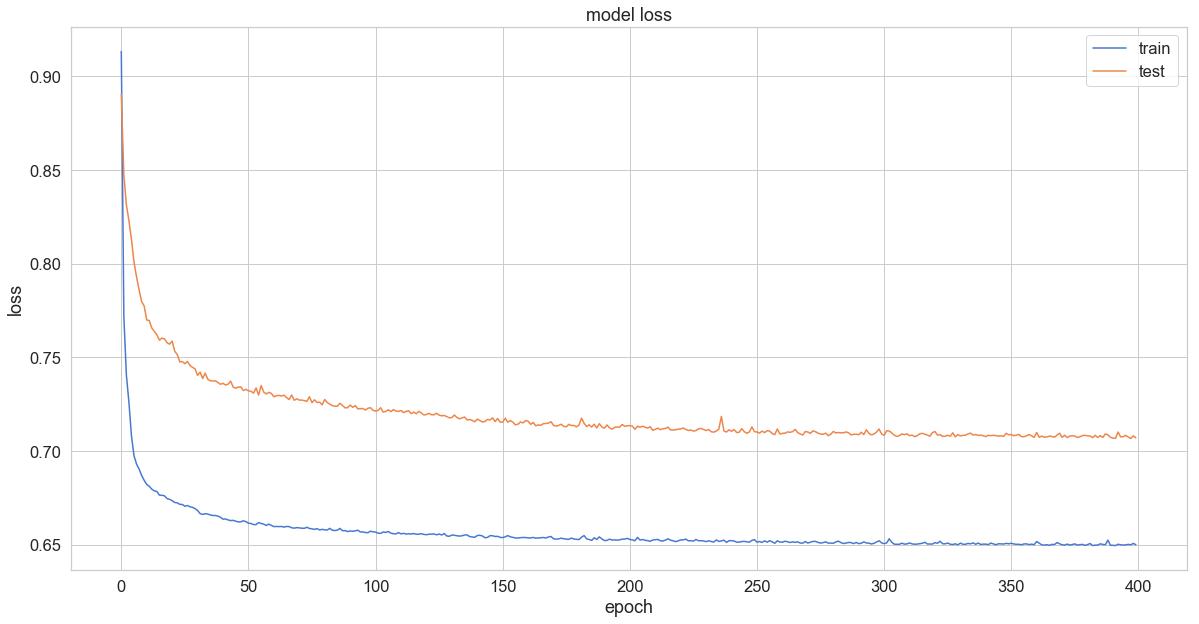

In [46]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [26]:
predictions = autoencoder.predict(X_test)

In [29]:
X_test

array([[ 4.2740989e-03, -2.1485124e+00, -2.8637362e+00, ...,
         7.5121356e-01,  1.4704227e-01,  4.3535057e-01],
       [-6.0090550e-01, -2.8540759e+00, -4.3914248e+00, ...,
         2.5121528e-01,  9.6966472e-01,  4.2123804e-01],
       [-1.5008938e+00, -2.3655078e+00, -2.3063070e+00, ...,
        -1.9158444e+00, -1.5414373e+00, -9.4956009e-02],
       ...,
       [ 1.5021178e+00,  8.1556497e-01, -1.0589376e+00, ...,
         1.0936289e+00,  2.7805979e-01,  6.7530099e-01],
       [ 1.3794993e+00, -9.3556975e-01, -2.4939560e+00, ...,
         1.1734652e+00,  5.6981663e-01,  1.1282441e+00],
       [ 7.3328392e-02, -2.3862282e+00, -3.5266147e+00, ...,
         5.6245165e-01,  1.5517770e+00,  5.9946867e-01]])

In [28]:
predictions

array([[0.22559759, 0.        , 0.        , ..., 0.6167645 , 0.16690733,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33934215, 0.9417237 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.7992793 , 0.3515257 , 0.        , ..., 0.8758671 , 0.346873  ,
        0.        ],
       [1.2678022 , 0.25197956, 0.        , ..., 1.198456  , 0.41005263,
        0.        ],
       [0.35668105, 0.        , 0.        , ..., 0.6394938 , 1.4984696 ,
        0.        ]], dtype=float32)

In [25]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})


In [ ]:
error_df

## Reconstruction error ohne mit Klasse 0

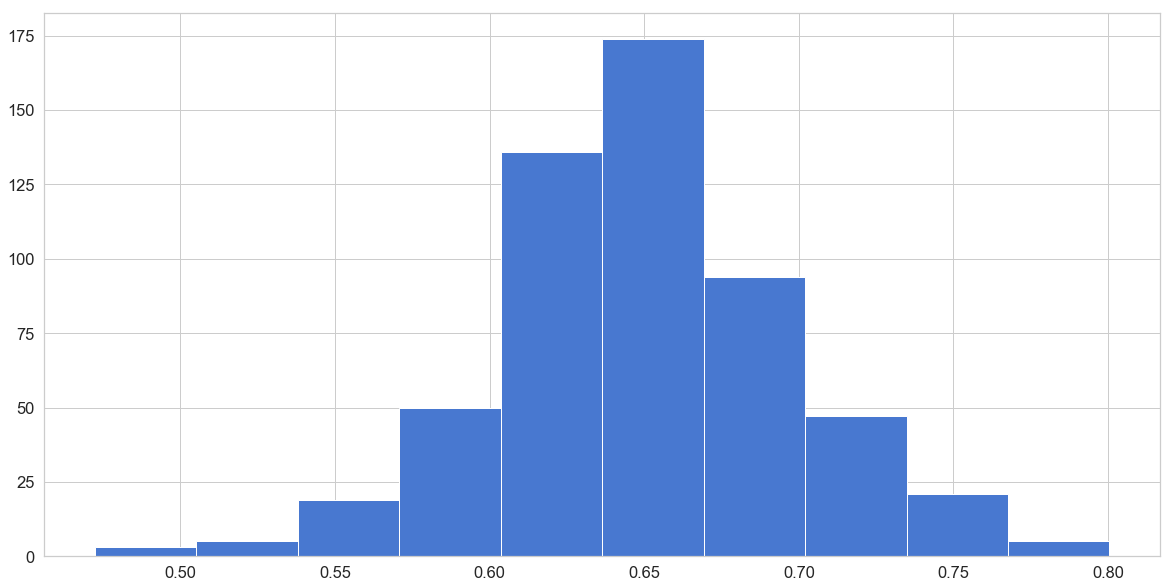

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [27]:
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
normal_error_df

,reconstruction_error,true_class
463,0.663547,0
2426,0.640844,0
1483,0.617588,0
501,0.661413,0
2355,0.648803,0
1812,0.635804,0
1178,0.622918,0
157,0.692762,0
330,0.667051,0
2437,0.618639,0


## Reconstruction error mit Klasse 1

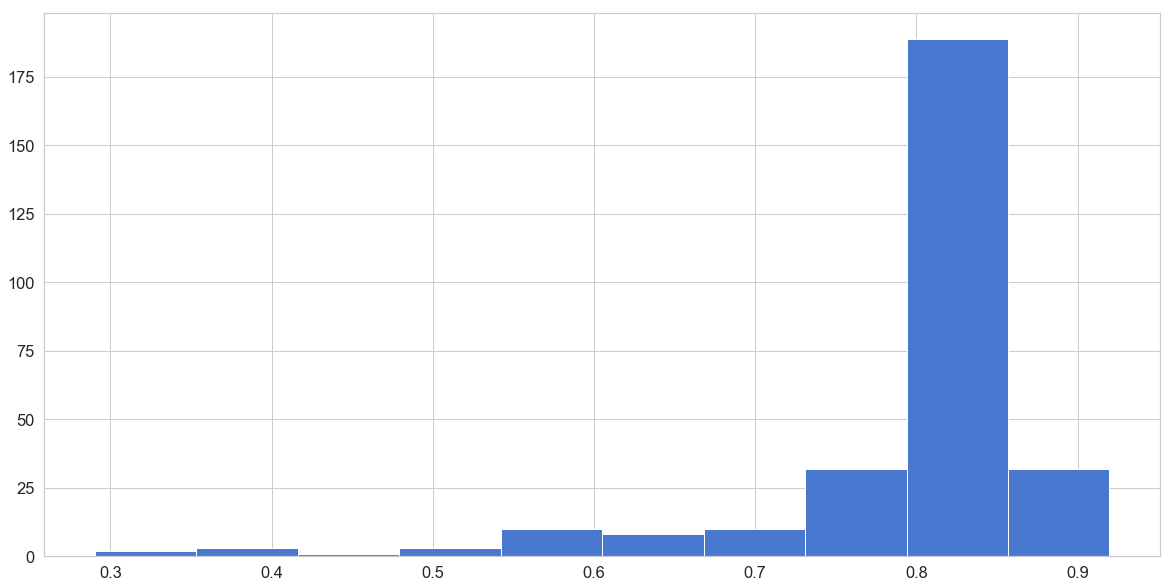

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

## EVALUATION DES AUTOENCODERS

In [50]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

## Mit ROC AUC (Receiver Operating Characteristic)

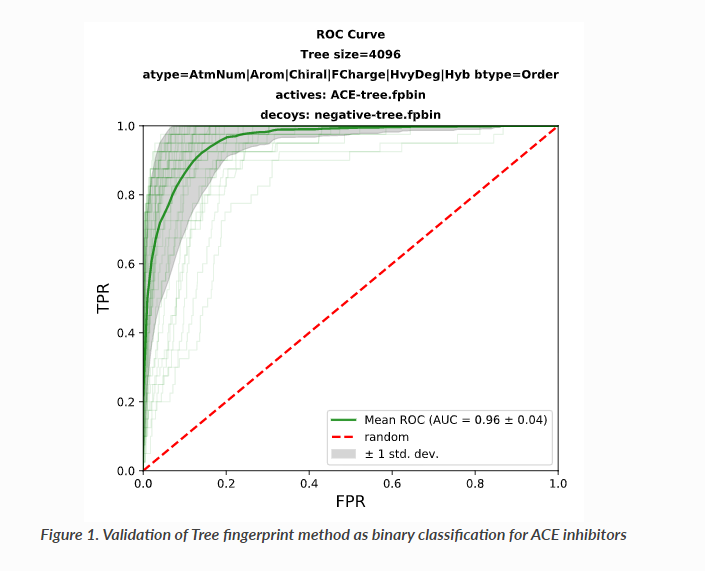

In [51]:
from IPython.display import Image
Image(filename= r"C:\Users\srfzx\Rocauc.png")

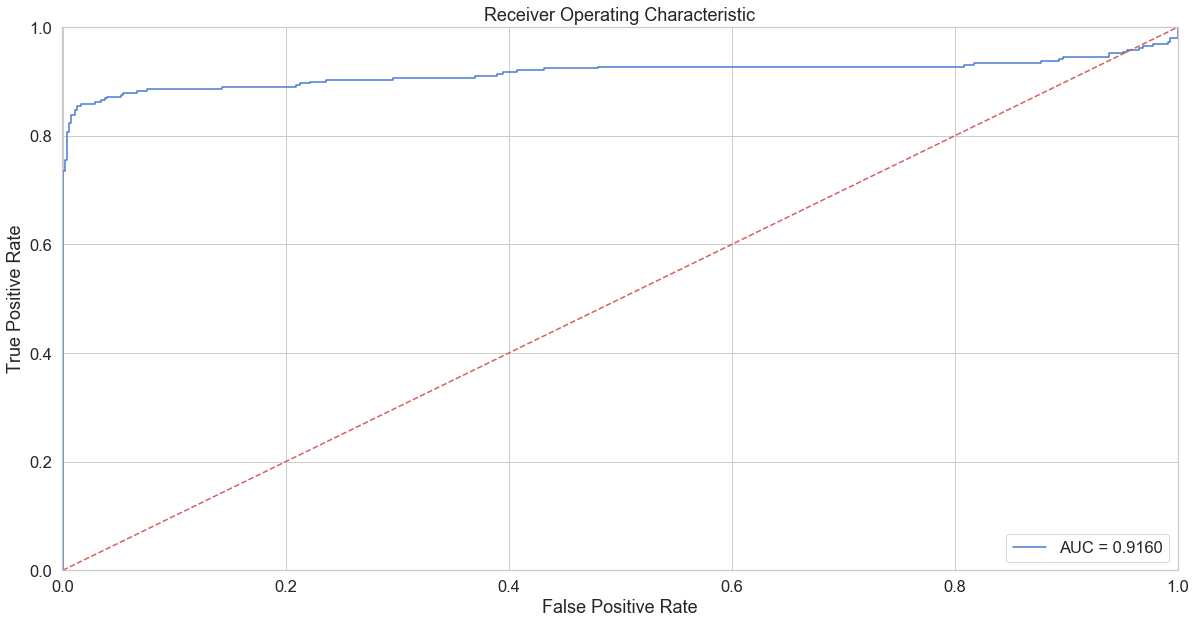

In [52]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Recall gegen Precision 

## Rekonstruktionsfehler als threshold

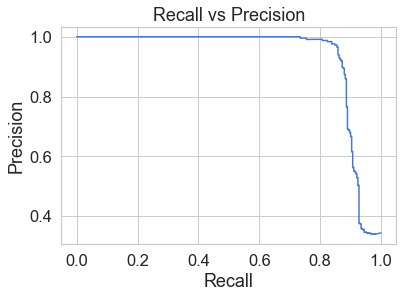

In [34]:
precision, recall, thresh = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

You can see that as the reconstruction error increases our precision rises as well. Let's have a look at the recall:

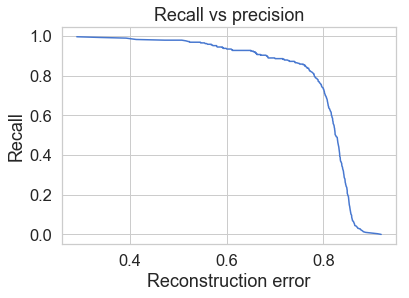

In [36]:
plt.plot(thresh, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall vs precision')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

## Force threshhold für die rekonstruktion loss

In [39]:
threshold = 0.8

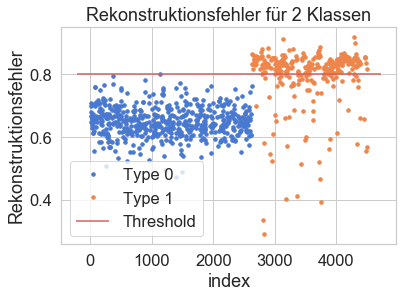

In [40]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Type 1" if name == 1 else "Type 0")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Rekonstruktionsfehler für 2 Klassen")
plt.ylabel("Rekonstruktionsfehler")
plt.xlabel("index")
plt.show();

## EVALUATION